In [1]:
import lal
import lalsimulation
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import unicode_literals

In [2]:
style = "times"

if style=="times":
    plt.style.use('/home/hosilva/tools/mplstyle/timesnromanstyle.mplstyle')
else:
    plt.style.use('/home/hosilva/tools/mplstyle/computermodernstyle.mplstyle')

In [3]:
data_GW150914_gr     = np.genfromtxt("/home/abhirup.ghosh/Documents/Work/spinqnm/runs/O3b/TGR/GW150914/ProdRuns/GR_prod3/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW150914_dcs    = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/parspec_runs/p4_l_df0_dtau0_CS_220203_1052/cbcBayes/posterior_samples.dat", names=True, dtype=None)

In [4]:
data_GW150914_gr_hos = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/parspec_runs/gr/cbcBayes/posterior_samples.dat", names=True, dtype=None)

In [5]:
GW150914_gr_mfs = data_GW150914_gr['mf_source_evol']
GW150914_gr_afs = data_GW150914_gr['af_evol']
GW150914_gr_z   = data_GW150914_gr['redshift']

GW150914_gr_hos_mfs = data_GW150914_gr_hos['mf_source_evol']
GW150914_gr_hos_afs = data_GW150914_gr_hos['af_evol']
GW150914_gr_hos_z   = data_GW150914_gr_hos['redshift']

GW150914_dcs_mfs = data_GW150914_dcs['mf_source_evol']
GW150914_dcs_afs = data_GW150914_dcs['af_evol']
GW150914_dcs_z   = data_GW150914_dcs['redshift']

In [6]:
GW150914_gr_mfaf  = np.vstack([GW150914_gr_mfs,  GW150914_gr_afs]).T
GW150914_gr_hos_mfaf  = np.vstack([GW150914_gr_hos_mfs,  GW150914_gr_hos_afs]).T
GW150914_dcs_mfaf = np.vstack([GW150914_dcs_mfs, GW150914_dcs_afs]).T

In [6]:
import corner

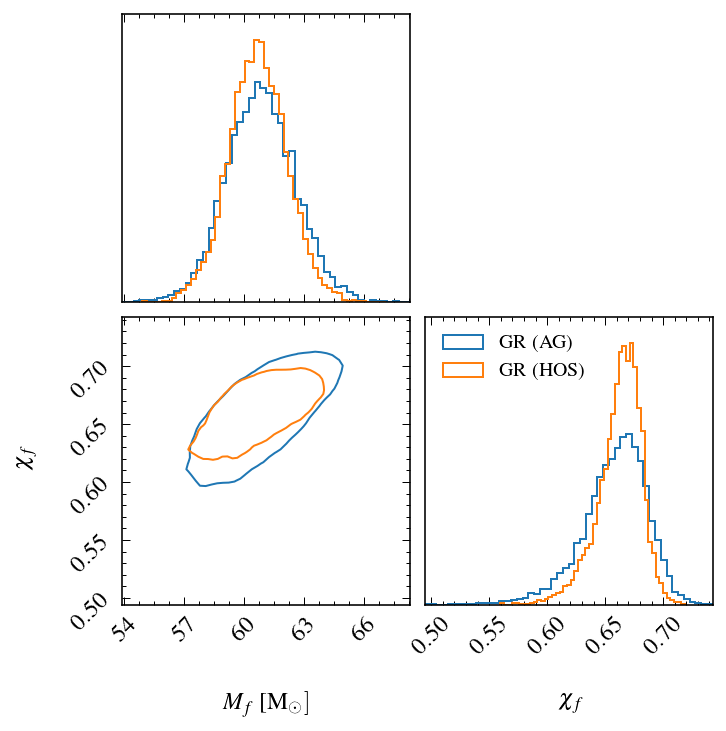

In [9]:
fig = corner.corner(GW150914_gr_mfaf, 
                    color='C0',
                    smooth=True,
                    bins=50,
                    plot_contours=True, levels=([0.9]),
                    plot_datapoints=False,
                    plot_density=None,
                    fill_contours=False,
                    hist_kwargs=dict(density=True))

corner.corner(GW150914_gr_hos_mfaf, 
              labels=[r"$M_{f}$~[M$_{\odot}]$", r"$\chi_{f}$"],
              color='C1',
              smooth=True,
              bins=50,
              plot_contours=True,levels=([0.9]),
              plot_datapoints=False,
              plot_density=None,
              fill_contours=False,
              show_titles=False,
              hist_kwargs=dict(density=True),
              fig=fig)

plt.legend(['GR (AG)', r'GR (HOS)'], loc='upper left')

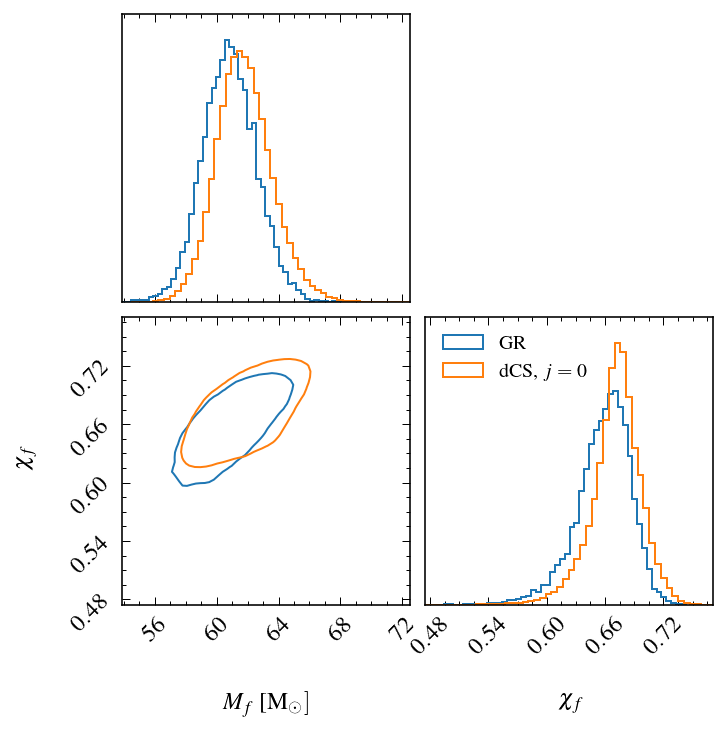

In [10]:
fig = corner.corner(GW150914_gr_mfaf, 
                    color='C0',
                    smooth=True,
                    bins=50,
                    plot_contours=True, levels=([0.9]),
                    plot_datapoints=False,
                    plot_density=None,
                    fill_contours=False,
                    hist_kwargs=dict(density=True))

corner.corner(GW150914_dcs_mfaf, 
              labels=[r"$M_{f}$~[M$_{\odot}]$", r"$\chi_{f}$"],
              color='C1',
              smooth=True,
              bins=50,
              plot_contours=True,levels=([0.9]),
              plot_datapoints=False,
              plot_density=None,
              fill_contours=False,
              show_titles=False,
              hist_kwargs=dict(density=True),
              fig=fig)

plt.legend(['GR', r'dCS, $j=0$'], loc='upper left')

# plt.savefig("fig_output/tmp_corner_plot.pdf")

In [45]:
GW150914_gr_mfafz  = np.vstack([GW150914_gr_mfs  * (1. + GW150914_gr_z),  GW150914_gr_afs,  GW150914_gr_z]).T
GW150914_dcs_mfafz = np.vstack([GW150914_dcs_mfs * (1. + GW150914_dcs_z), GW150914_dcs_afs, GW150914_dcs_z]).T

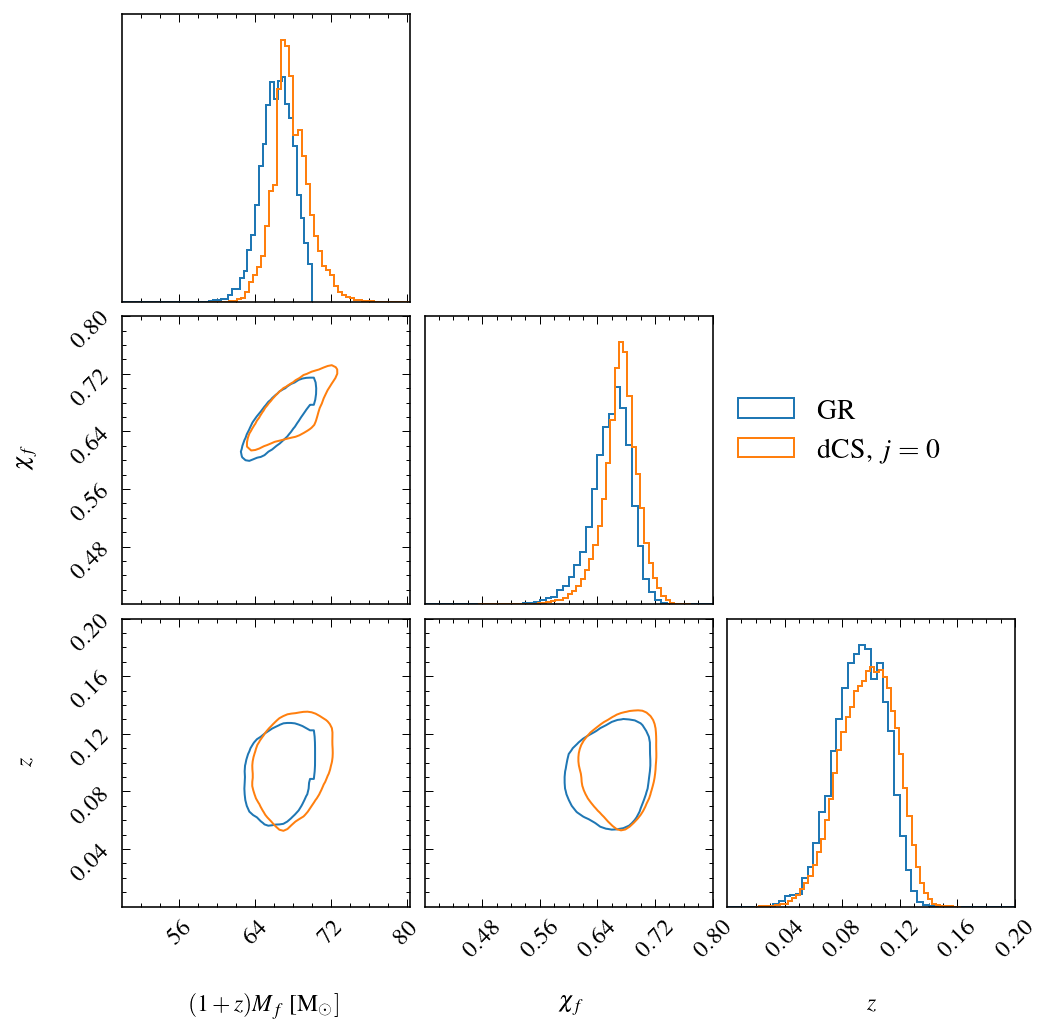

In [47]:
# fig = corner.corner(GW150914_gr_mfafz, 
#                     color='C0',
#                     smooth=True,
#                     bins=50,
#                     plot_contours=True, 
#                     levels=([0.9]),
#                     plot_datapoints=False,
#                     hist_kwargs=dict(density=True))

fig = corner.corner(GW150914_gr_mfafz,
                    range=[(50, 70), (0.4, 0.8), (0, 0.2)],
                    color='C0',
                    smooth=True,
                    bins=50,
                    plot_contours=True,
                    levels=([0.9]),
                    plot_datapoints=False,
                    plot_density=None,
                    show_titles=False,
                    hist_kwargs=dict(density=True),
                    labelpad=0.,
                    labels=[r"$(1+z)M_{f}$~[M$_{\odot}]$", r"$\chi_{f}$", r"$z$"]
                    )

corner.corner(GW150914_dcs_mfafz, 
              color='C1',
              smooth=True,
              bins=50,
              plot_contours=True,
              levels=([0.9]),
              plot_datapoints=False,
              plot_density=None,
              show_titles=False,
              hist_kwargs=dict(density=True),
              fig=fig)

ndim = 3
axes = np.array(fig.axes).reshape((ndim, ndim))

# axes[1, 0].yaxis.set_ticks(ticks=[0.4, 0.6, 0.8]);
# axes[2, 0].yaxis.set_ticks(ticks=[0.0, 0.1, 0.2]);

# plt.legend(, loc='upper left')
plt.legend(['GR', r'dCS, $j=0$'], loc=[0,1.5], fontsize=14)

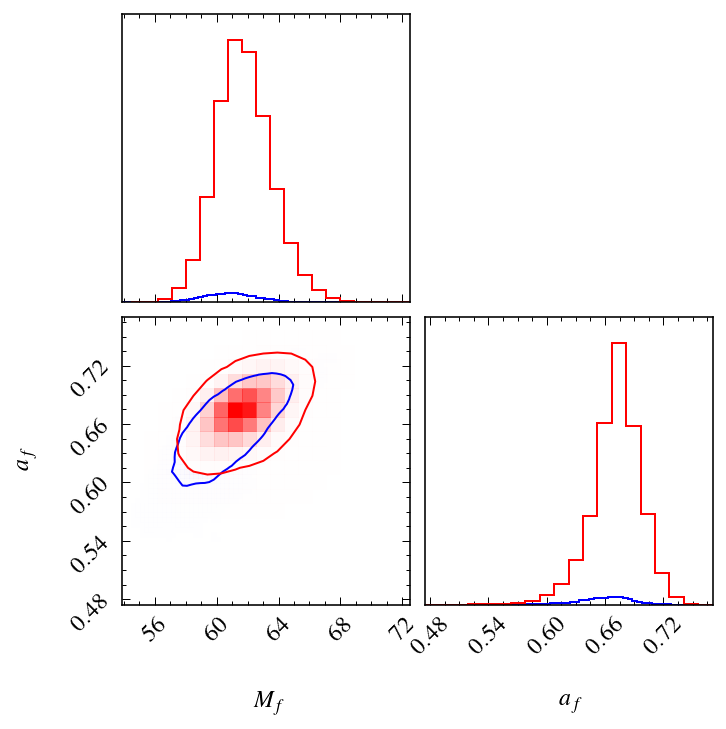

In [27]:
fig = corner.corner(GW150914_gr_mfaf,
                    labels=[r'$M_f$',
                            r'$a_f$'],
                    smooth=True,color='blue',truth_color='grey', bins=50,
                    plot_contours=True,levels=([0.9]),plot_datapoints=False)


corner.corner(GW150914_dcs_mfaf,
                    labels=[r'$M_f$',
                            r'$a_f$'],
                    smooth=True,color='red',
                    plot_contours=True,levels=([0.9]),
                    plot_datapoints=False, fig=fig)


plt.minorticks_on()

fig.show()

Same type of plots, but using ChainConsumer

In [7]:
from chainconsumer import ChainConsumer

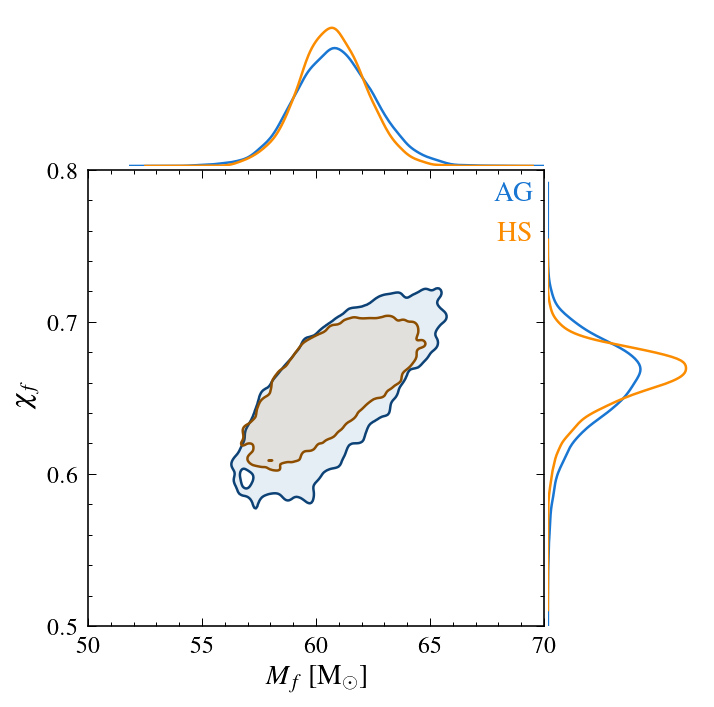

In [8]:
c = ChainConsumer()

c.add_chain(GW150914_gr_mfaf,     parameters=[r"$M_f$ [M$_{\odot}$]", r"$\chi_f$"], name="AG")
c.add_chain(GW150914_gr_hos_mfaf, parameters=[r"$M_f$ [M$_{\odot}$]", r"$\chi_f$"], name="HS")
c.configure(linestyles=["-", "-"], 
            linewidths=[1.25, 1.25],
            colors=['b', 'o'],
            sigmas=[2],
            spacing=1/4., 
            shade_alpha=[0.1, 0.1],
            bar_shade=[False, False],
            diagonal_tick_labels=False,
            tick_font_size=12,
            label_font_size=14)

fig = c.plotter.plot(figsize='COLUMN',
                     extents={r"$M_f$ [M$_{\odot}$]":(50,70), r"$\chi_f$": (0.5, 0.8)})

# Trick from corner, which we can apply here as well
axes = np.array(fig.axes).reshape((2, 2))
axes[1, 0].xaxis.set_ticks(ticks=np.arange(50, 70 + 5, 5));
axes[0, 0].axis('off')
axes[1, 0].yaxis.set_ticks(ticks=np.arange(0.5, 0.8 + 0.1, 0.1));
axes[1, 1].axis('off')

fig.savefig('fig_output/tmp_corner.pdf')

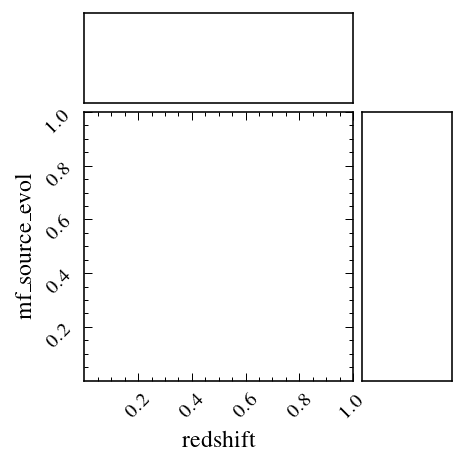

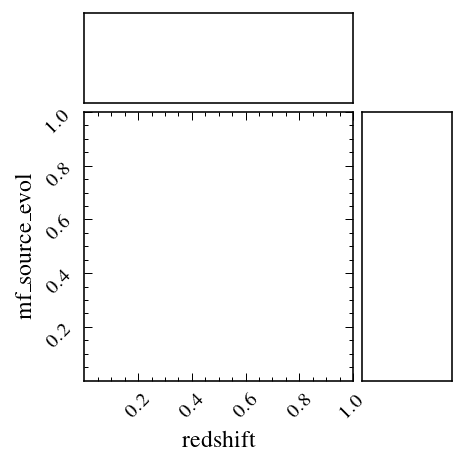

In [13]:
ctmp = ChainConsumer()

ctmp.add_chain(data_GW150914_gr)

ctmp.plotter.plot(parameters=["redshift","mf_source_evol"])

In [119]:
fig = c.plotter.plot_summary(parameters=[r"$M_f$ [M$_{\odot}$]", r"$\chi_f$"])

RuntimeError: latex was not able to process the following string:
b'$$M_f$ [M$_{\\\\odot}$]$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2019/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../65918cc9e42752e77d502604dc64a535.tex
LaTeX2e <2018-12-01>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file 65918cc9e42752e77d502604dc64a535.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ztmcm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omlztmcm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omsztmcm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omxztmcm.fd)
! Display math should end with $$.
<to be read again> 
                    
l.19 {\rmfamily $$M_f$ 
                       [M$_{\odot}$]$}
No pages of output.
Transcript written on 65918cc9e42752e77d502604dc64a535.log.




<Figure size 221.036x108 with 6 Axes>

In [116]:
print(len(GW150914_gr_hos_z), len(GW150914_gr_z))

12876 14096
